In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import calendar

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/sumanshrestha/Documents/AI Class Omdena/capstone-project-makaisuman/data/Temperature.csv')

In [3]:
df.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880206 entries, 0 to 880205
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          880206 non-null  object 
 1   District      880206 non-null  object 
 2   Latitude      880206 non-null  float64
 3   Longitude     880206 non-null  float64
 4   Temp_2m       880206 non-null  float64
 5   MaxTemp_2m    880206 non-null  float64
 6   MinTemp_2m    880206 non-null  float64
 7   TempRange_2m  880206 non-null  float64
dtypes: float64(6), object(2)
memory usage: 53.7+ MB


In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
# Extract the features 
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880206 entries, 0 to 880205
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          880206 non-null  datetime64[ns]
 1   District      880206 non-null  object        
 2   Latitude      880206 non-null  float64       
 3   Longitude     880206 non-null  float64       
 4   Temp_2m       880206 non-null  float64       
 5   MaxTemp_2m    880206 non-null  float64       
 6   MinTemp_2m    880206 non-null  float64       
 7   TempRange_2m  880206 non-null  float64       
 8   year          880206 non-null  int32         
 9   month         880206 non-null  int32         
 10  day           880206 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(3), object(1)
memory usage: 63.8+ MB


In [7]:
df.columns.tolist()

['Date',
 'District',
 'Latitude',
 'Longitude',
 'Temp_2m',
 'MaxTemp_2m',
 'MinTemp_2m',
 'TempRange_2m',
 'year',
 'month',
 'day']

In [8]:
# 2. Check for missing values
print(df.isnull().sum())

Date            0
District        0
Latitude        0
Longitude       0
Temp_2m         0
MaxTemp_2m      0
MinTemp_2m      0
TempRange_2m    0
year            0
month           0
day             0
dtype: int64


In [9]:
# 3. Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880206 entries, 0 to 880205
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          880206 non-null  datetime64[ns]
 1   District      880206 non-null  object        
 2   Latitude      880206 non-null  float64       
 3   Longitude     880206 non-null  float64       
 4   Temp_2m       880206 non-null  float64       
 5   MaxTemp_2m    880206 non-null  float64       
 6   MinTemp_2m    880206 non-null  float64       
 7   TempRange_2m  880206 non-null  float64       
 8   year          880206 non-null  int32         
 9   month         880206 non-null  int32         
 10  day           880206 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(3), object(1)
memory usage: 63.8+ MB


In [11]:
df.head()

,Date,District,Latitude,Longitude,Temp_2m,MaxTemp_2m,MinTemp_2m,TempRange_2m,year,month,day
0,1989-01-01,Arghakhanchi,27.9,83.2,14.16,20.40,9.76,10.63,1989,1,1
1,1989-01-02,Arghakhanchi,27.9,83.2,14.35,20.67,10.37,10.31,1989,1,2
2,1989-01-03,Arghakhanchi,27.9,83.2,14.22,20.88,9.90,10.99,1989,1,3
3,1989-01-04,Arghakhanchi,27.9,83.2,13.41,20.19,9.31,10.88,1989,1,4
4,1989-01-05,Arghakhanchi,27.9,83.2,13.99,20.53,9.50,11.03,1989,1,5


In [12]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880206 entries, 0 to 880205
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          880206 non-null  datetime64[ns]
 1   District      880206 non-null  object        
 2   Latitude      880206 non-null  float64       
 3   Longitude     880206 non-null  float64       
 4   Temp_2m       880206 non-null  float64       
 5   MaxTemp_2m    880206 non-null  float64       
 6   MinTemp_2m    880206 non-null  float64       
 7   TempRange_2m  880206 non-null  float64       
 8   year          880206 non-null  int32         
 9   month         880206 non-null  int32         
 10  day           880206 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(3), object(1)
memory usage: 63.8+ MB
None


In [13]:
import io

In [14]:
# 2. Check for missing values
print(df.isnull().sum())

Date            0
District        0
Latitude        0
Longitude       0
Temp_2m         0
MaxTemp_2m      0
MinTemp_2m      0
TempRange_2m    0
year            0
month           0
day             0
dtype: int64


In [15]:
# 4. Recheck for nulls after conversion (in case of invalid dates)
print(df['Date'].isnull().sum())

0


In [16]:
# 5. Drop rows with invalid/missing dates or other critical fields (optional)
df = df.dropna(subset=['Date'])

In [17]:
# 6. Check and remove duplicates
df = df.drop_duplicates()


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880206 entries, 0 to 880205
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date          880206 non-null  datetime64[ns]
 1   District      880206 non-null  object        
 2   Latitude      880206 non-null  float64       
 3   Longitude     880206 non-null  float64       
 4   Temp_2m       880206 non-null  float64       
 5   MaxTemp_2m    880206 non-null  float64       
 6   MinTemp_2m    880206 non-null  float64       
 7   TempRange_2m  880206 non-null  float64       
 8   year          880206 non-null  int32         
 9   month         880206 non-null  int32         
 10  day           880206 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(3), object(1)
memory usage: 63.8+ MB


In [19]:
# 7. Feature engineering: extract year, month, day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Temperature Over Time (Line Plot)

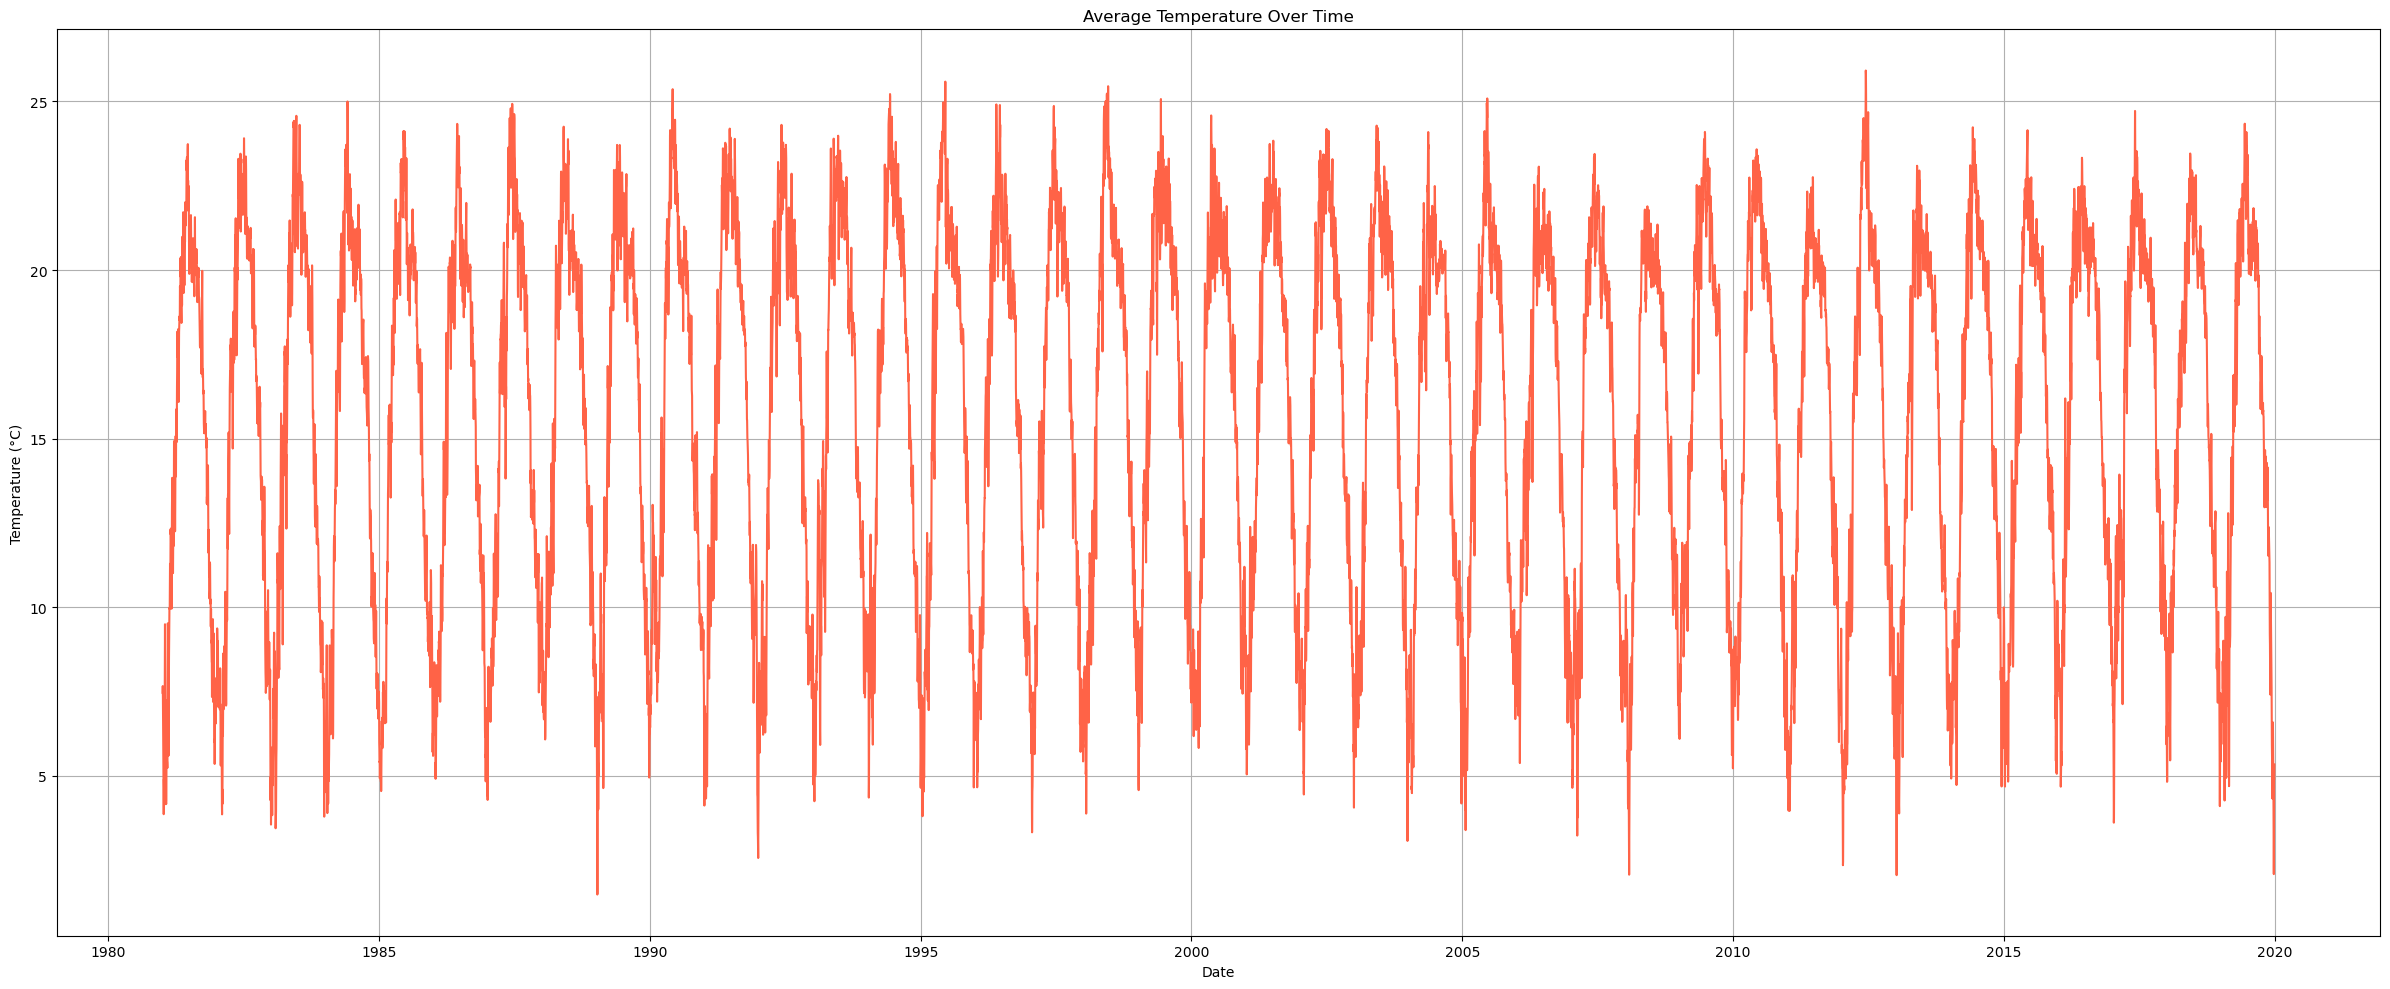

In [20]:
temp_by_date = df.groupby('Date')['Temp_2m'].mean()

plt.figure(figsize=(24, 10))
plt.plot(temp_by_date.index, temp_by_date.values, color='tomato')
plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.tight_layout()
plt.show()

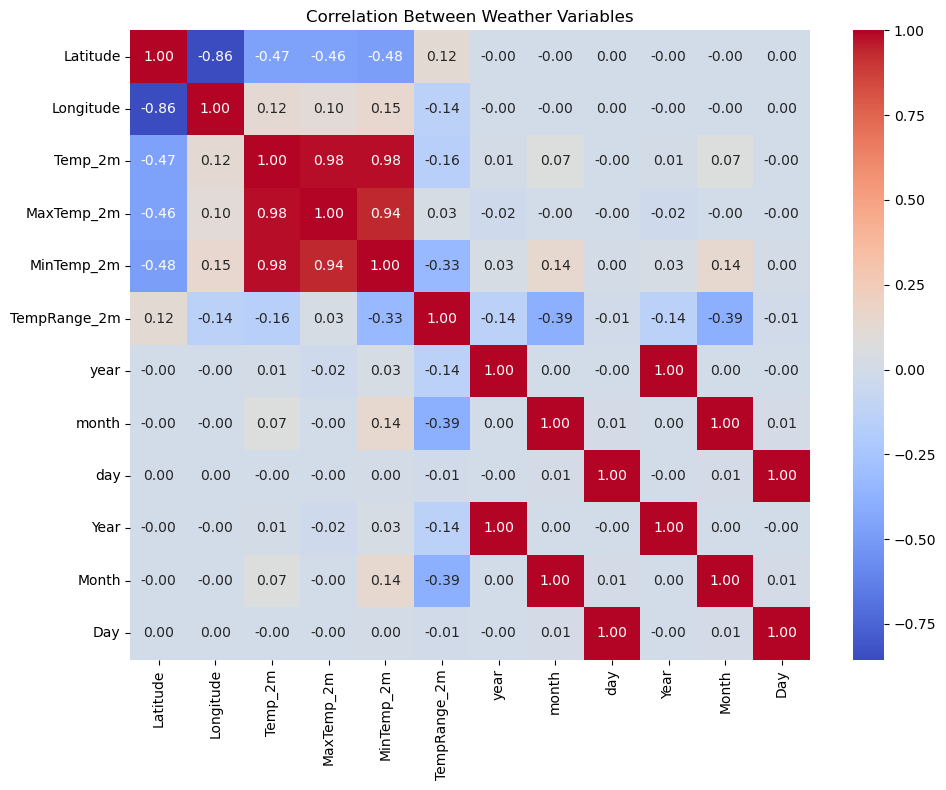

In [21]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Weather Variables')
plt.tight_layout()
plt.show()


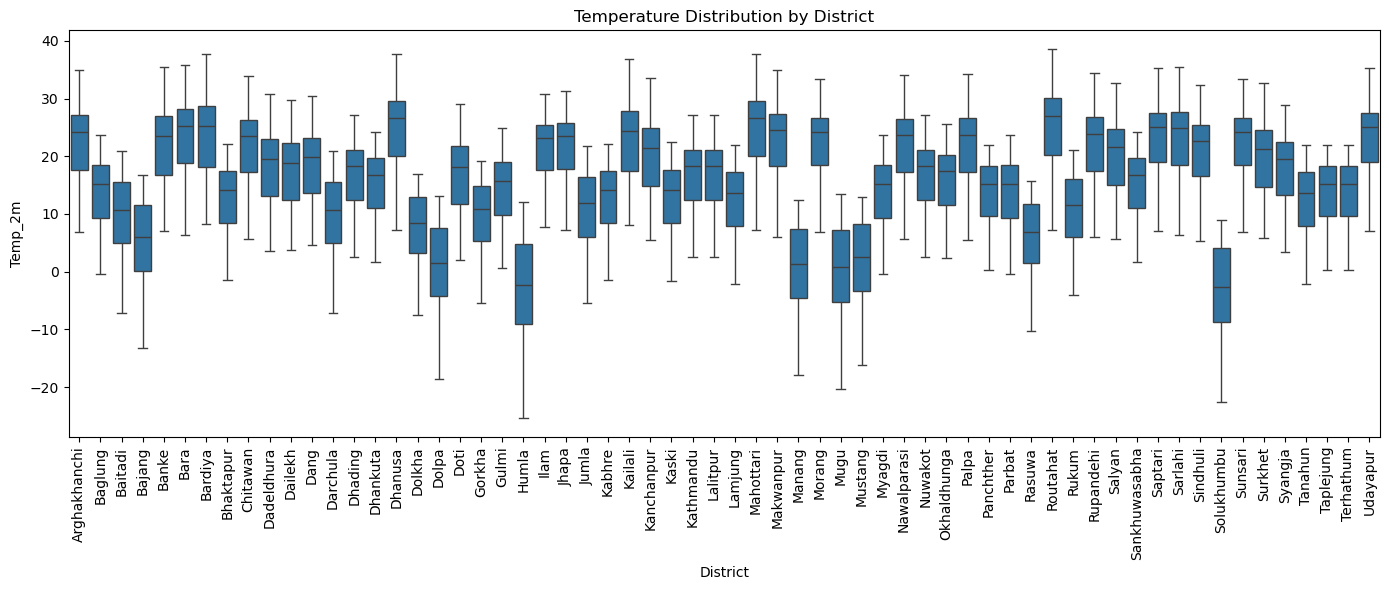

In [22]:
# Temperature Distribution by District (Boxplot)
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='District', y='Temp_2m')
plt.xticks(rotation=90)
plt.title('Temperature Distribution by District')
plt.tight_layout()
plt.show()

In [23]:


# Center the map on the average location
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=6)

# Add points colored by Temp
for _, row in df.groupby('District').mean(numeric_only=True).iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        popup=f"{row.name}: {row['Temp_2m']:.1f} °C",
        color='blue',
        fill=True,
        fill_color='red' if row['Temp_2m'] > 30 else 'blue',
        fill_opacity=0.7
    ).add_to(m)

m  # Display the interactive map in Jupyter/Colab


/var/folders/mj/kbf0dkpx2136xtprhzggb4rh0000gn/T/ipykernel_1683/1582465700.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_avg, x='Month', y='Temp_2m', palette='coolwarm')


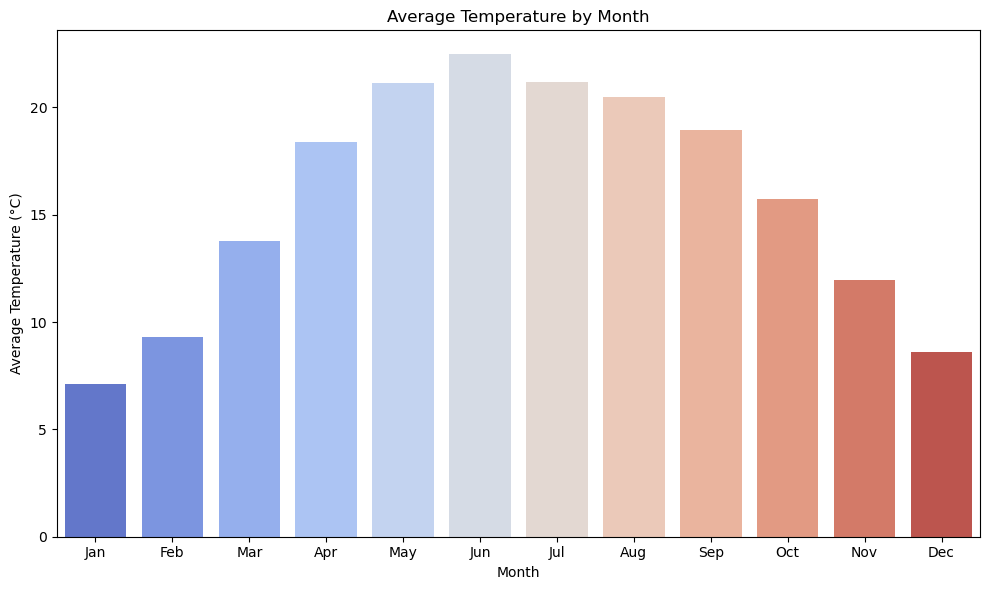

In [24]:
# Monthly Average Temperature Chart
# Ensure 'Date' column is datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month

# Group by Month and calculate average temperature
monthly_avg = df.groupby('Month')['Temp_2m'].mean().reset_index()

# Optional: map month numbers to names
import calendar
monthly_avg['Month'] = monthly_avg['Month'].apply(lambda x: calendar.month_abbr[x])

# Sort months by calendar order
monthly_avg['Month'] = pd.Categorical(monthly_avg['Month'], categories=calendar.month_abbr[1:], ordered=True)
monthly_avg = monthly_avg.sort_values('Month')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_avg, x='Month', y='Temp_2m', palette='coolwarm')
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.tight_layout()
plt.show()

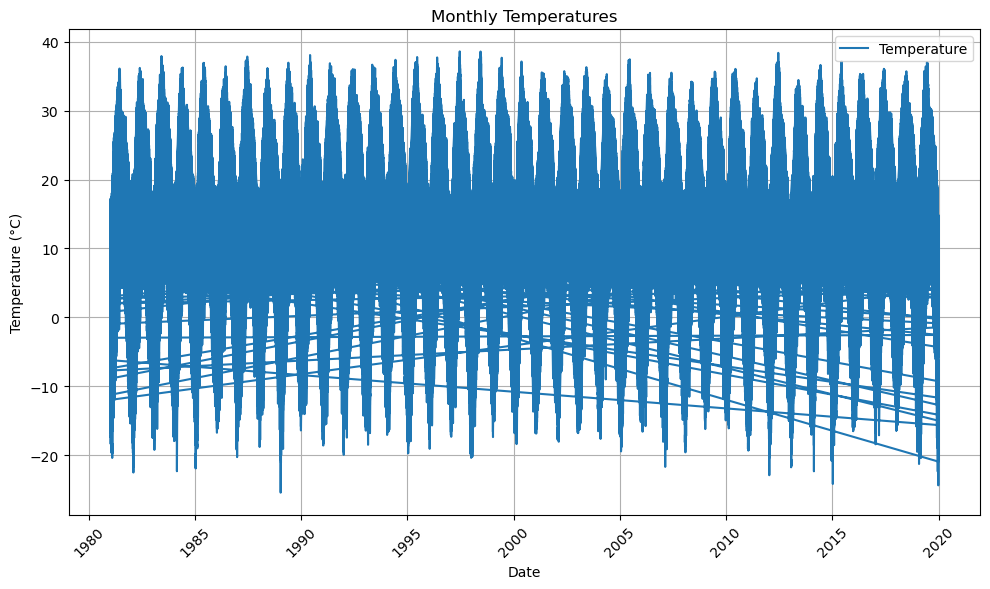

In [25]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['Date'], df['Temp_2m'], label='Temperature', color='tab:blue')

ax.set_xlabel("Date")
ax.set_ylabel("Temperature (°C)")
ax.set_title("Monthly Temperatures")
ax.grid(True)
ax.legend()

plt.xticks(rotation=45)  # Optional: rotate x-axis labels for better readability
plt.tight_layout()       # Optional: adjust layout to prevent label cutoff
plt.show()

In [26]:
df.head()

,Date,District,Latitude,Longitude,Temp_2m,MaxTemp_2m,MinTemp_2m,TempRange_2m,year,month,day,Year,Month,Day
0,1989-01-01,Arghakhanchi,27.9,83.2,14.16,20.40,9.76,10.63,1989,1,1,1989,1,1
1,1989-01-02,Arghakhanchi,27.9,83.2,14.35,20.67,10.37,10.31,1989,1,2,1989,1,2
2,1989-01-03,Arghakhanchi,27.9,83.2,14.22,20.88,9.90,10.99,1989,1,3,1989,1,3
3,1989-01-04,Arghakhanchi,27.9,83.2,13.41,20.19,9.31,10.88,1989,1,4,1989,1,4
4,1989-01-05,Arghakhanchi,27.9,83.2,13.99,20.53,9.50,11.03,1989,1,5,1989,1,5


In [30]:

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
# Features and target
features = ['year', 'month', 'day']
target = 'Temp_2m'

In [31]:
X = df[features]
y = df[target]

In [32]:
# Split and train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [34]:
# Evaluate model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [35]:
print(f"R^2: {r2:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

R^2: 0.33
MAE: 5.93
RMSE: 7.49


In [36]:
custom_input = pd.DataFrame([[2025, 5, 1]], columns=features)  # Example: May 1, 2025
prediction = model.predict(custom_input)[0]
print(f"\n🌡️ Predicted Temp_2m for 2025-05-01: {prediction:.2f} °C")



🌡️ Predicted Temp_2m for 2025-05-01: 20.45 °C


/var/folders/mj/kbf0dkpx2136xtprhzggb4rh0000gn/T/ipykernel_1683/2625578963.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


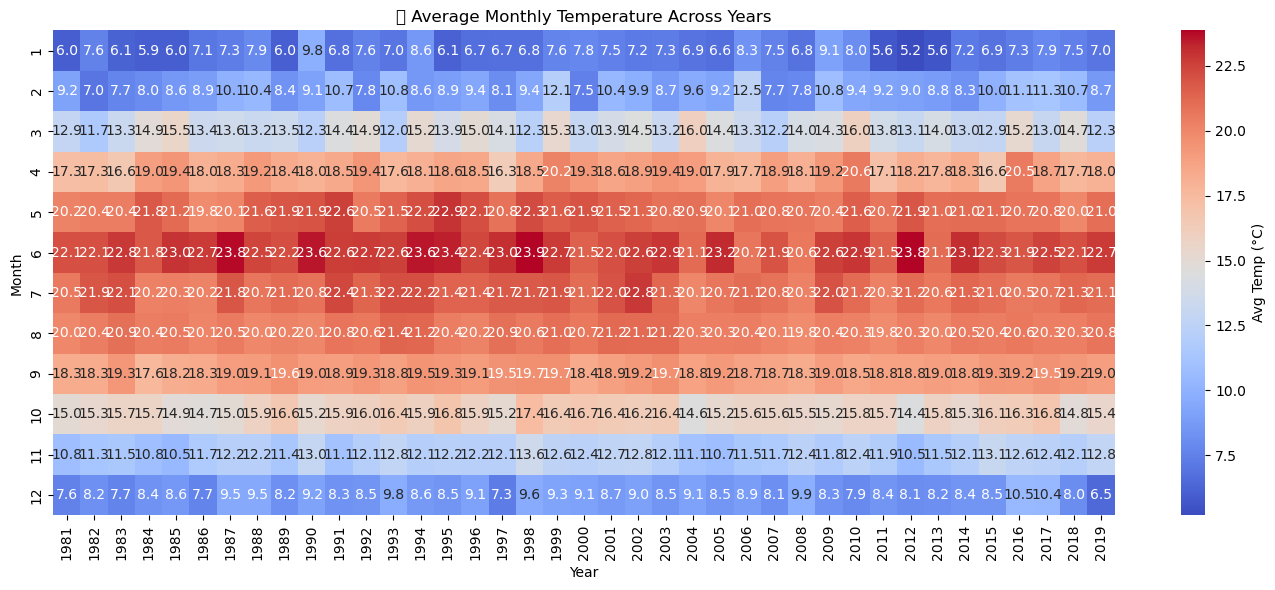

In [37]:
# Group by year and month to get average temperature
monthly_avg = df.groupby(['year', 'month'])['Temp_2m'].mean().reset_index()

# Pivot for heatmap-style plot
pivot_table = monthly_avg.pivot(index='month', columns='year', values='Temp_2m')

# Plot as heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Avg Temp (°C)'})
plt.title("📊 Average Monthly Temperature Across Years")
plt.xlabel("Year")
plt.ylabel("Month")
plt.tight_layout()
plt.show()

/var/folders/mj/kbf0dkpx2136xtprhzggb4rh0000gn/T/ipykernel_1683/2512726643.py:13: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


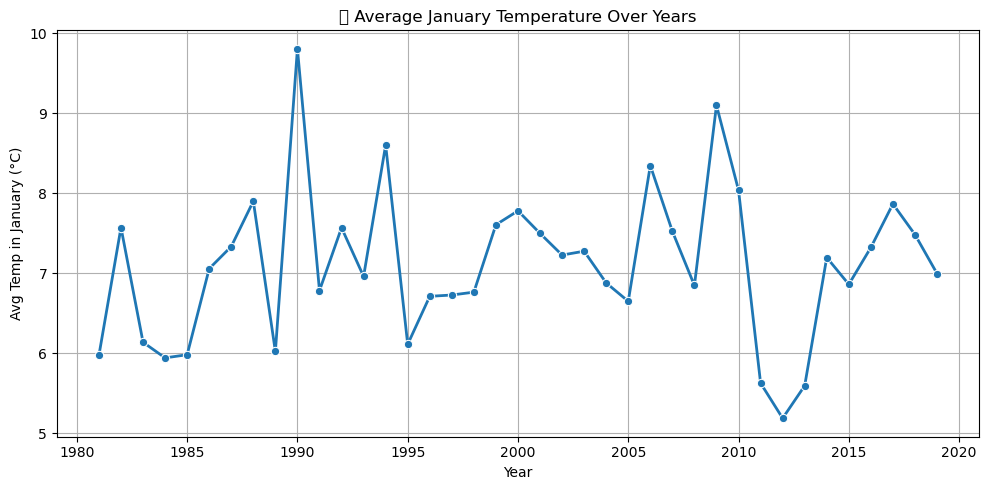

In [38]:
jan_df = df[df['month'] == 1]

# Group by year to get average January temp
jan_avg = jan_df.groupby('year')['Temp_2m'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=jan_avg, x='year', y='Temp_2m', marker='o', linewidth=2)
plt.title("📈 Average January Temperature Over Years")
plt.xlabel("Year")
plt.ylabel("Avg Temp in January (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()